In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [119]:
train = pd.read_csv('https://raw.githubusercontent.com/sathishrouthu/BigMart-Sales_Prediction/main/data/Final_/Train.csv')

test = pd.read_csv('https://raw.githubusercontent.com/sathishrouthu/BigMart-Sales_Prediction/main/data/Final_/Test.csv')

In [120]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_New,Item_Category,Outlet_Years,Price_per_Unitwt,MRP_group,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,Perishable,FD,11,26.86,very_high,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,Non_Perishable,DR,1,8.15,low,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,Perishable,FD,11,8.09,high,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,Perishable,FD,12,9.48,high,732.3800
4,NCD19,8.93,No_Fat,0.009780,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,Non_Perishable,NC,23,6.03,low,994.7052


In [121]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_New,Item_Category,Outlet_Years,Price_per_Unitwt,MRP_group
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,Not_Sure,FD,11,5.20,medium
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1,Perishable,FD,3,10.52,medium
2,NCN55,14.600,No_Fat,0.099575,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,Not_Sure,NC,12,16.56,very_high
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1,Not_Sure,FD,3,21.19,high
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,Perishable,FD,25,17.22,very_high


In [122]:
sathish_sub = test[['Item_Identifier','Outlet_Identifier']]

In [123]:
sathish_sub.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [124]:
data = pd.concat([train,test],keys=['train','test'])

## Remove 

## Encoding

### Ordinal

In [125]:
Ordinal_var = ['Outlet_Size','Outlet_Location_Type','MRP_group']

In [126]:
data['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [127]:
data['Outlet_Size'] = data['Outlet_Size'].map({'Small':1,'Medium':2,'High':3})

In [128]:
#

In [129]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [130]:
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].map({'Tier 1':3,'Tier 2':2,'Tier 3':1})

In [131]:
#

In [132]:
data['MRP_group'] = data['MRP_group'].map({'low':1,'medium':2,'high':3,'very_high':4})

In [136]:
data.drop(['Item_Type_New','Price_per_Unitwt'],axis=1,inplace =True)

### Categorical

In [137]:
cat_var = ['Item_Fat_Content','Outlet_Identifier','Outlet_Type','Item_Category']

In [138]:
ohc_cols = pd.DataFrame()

In [139]:
for var in cat_var:
    ohc = pd.get_dummies(data[var],drop_first=True,prefix=var)
    ohc_cols = pd.concat([ohc_cols,ohc],axis=1)
    

In [140]:
ohc_cols

Item_Fat_Content_No_Fat  Item_Fat_Content_Regular  \
train 0                           0                         0   
      1                           0                         1   
      2                           0                         0   
      3                           0                         1   
      4                           1                         0   
...                             ...                       ...   
test  5676                        0                         1   
      5677                        0                         1   
      5678                        1                         0   
      5679                        0                         1   
      5680                        0                         1   

            Outlet_Identifier_OUT013  Outlet_Identifier_OUT017  \
train 0                            0                         0   
      1                            0                         0   
      2                            0                         0   
      3                            0                         0   
      4                            1                         0   
...                              ...                       ...   
test  5676                         0                         0   
      5677                         0                         0   
      5678                         0                         0   
      5679                         0                         1   
      5680                         0                         0   

            Outlet_Identifier_OUT018  Outlet_Identifier_OUT019  \
train 0                            0                         0   
      1                            1                         0   
      2                            0                         0   
      3                            0                         0   
      4                            0                         0   
...                              ...                       ...   
test  5676                         0                         0   
      5677                         1                         0   
      5678                         0                         0   
      5679                         0                         0   
      5680                         0                         0   

            Outlet_Identifier_OUT027  Outlet_Identifier_OUT035  \
train 0                            0                         0   
      1                            0                         0   
      2                            0                         0   
      3                            0                         0   
      4                            0                         0   
...                              ...                       ...   
test  5676                         0                         0   
      5677                         0                         0   
      5678                         0                         0   
      5679                         0                         0   
      5680                         0                         0   

            Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
train 0                            0                         0   
      1                            0                         0   
      2                            0                         0   
      3                            0                         0   
      4                            0                         0   
...                              ...                       ...   
test  5676                         0                         1   
      5677                         0                         0   
      5678                         1                         0   
      5679                         0                         0   
      5680                         1                         0   

            Outlet_Identifier_OUT049  Outlet_Type_Supermark

In [141]:
ds = pd.concat( [data.drop(cat_var,axis=1),ohc_cols],axis=1)

In [142]:
ds

Item_Identifier  Item_Weight  Item_Visibility  \
train 0              FDA15         9.30         0.016047   
      1              DRC01         5.92         0.019278   
      2              FDN15        17.50         0.016760   
      3              FDX07        19.20         0.017834   
      4              NCD19         8.93         0.009780   
...                    ...          ...              ...   
test  5676           FDB58        10.50         0.013496   
      5677           FDD47         7.60         0.142991   
      5678           NCO17        10.00         0.073529   
      5679           FDJ26        15.30         0.088380   
      5680           FDU37         9.50         0.104720   

                        Item_Type  Item_MRP  Outlet_Size  \
train 0                     Dairy  249.8092            2   
      1               Soft Drinks   48.2692            2   
      2                      Meat  141.6180            2   
      3     Fruits and Vegetables  182.0950            1   
      4                 Household   53.8614            3   
...                           ...       ...          ...   
test  5676            Snack Foods  141.3154            1   
      5677          Starchy Foods  169.1448            2   
      5678     Health and Hygiene  118.7440            1   
      5679                 Canned  214.6218            1   
      5680                 Canned   79.7960            1   

            Outlet_Location_Type  Outlet_Years  MRP_group  Item_Outlet_Sales  \
train 0                        3            11          4          3735.1380   
      1                        1             1          1           443.4228   
      2                        3            11          3          2097.2700   
      3                        1            12          3           732.3800   
      4                        1            23          1           994.7052   
...                          ...           ...        ...                ...   
test  5676                     3            13          3                NaN   
      5677                     1             1          3                NaN   
      5678                     2             8          2                NaN   
      5679                     2             3          4                NaN   
      5680                     2             8          2                NaN   

            ...  Outlet_Identifier_OUT027  Outlet_Identifier_OUT035  \
train 0     ...                         0                         0   
      1     ...                         0                         0   
      2     ...                         0                         0   
      3     ...                         0                         0   
      4     ...                         0                         0   
...         ...                       ...                       ...   
test  5676  ...                         0                         0   
      5677  ...                         0                         0   
      5678  ...                         0                         0   
      5679  ...                         0                         0   
      5680  ...                         0                         0   

            Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
train 0                            0                         0   
      1                            0                         0   
      2                            0                         0   
      3                            0                         0   
      4                            0                         0   
...                              ...                       ...   
test  5676                         0                         1   
      5677                         0                         0   
      5678                         1                         0   
      5679                         0                         0   
      5680                   

In [143]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14204 entries, ('train', 0) to ('test', 5680)
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                14204 non-null  object 
 1   Item_Weight                    14204 non-null  float64
 2   Item_Visibility                14204 non-null  float64
 3   Item_Type                      14204 non-null  object 
 4   Item_MRP                       14204 non-null  float64
 5   Outlet_Size                    14204 non-null  int64  
 6   Outlet_Location_Type           14204 non-null  int64  
 7   Outlet_Years                   14204 non-null  int64  
 8   MRP_group                      14204 non-null  int64  
 9   Item_Outlet_Sales              8523 non-null   float64
 10  Item_Fat_Content_No_Fat        14204 non-null  uint8  
 11  Item_Fat_Content_Regular       14204 non-null  uint8  
 12  Outlet_Identifier_OUT013  

In [144]:
ds.drop(['Item_Identifier','Item_Type'],axis=1,inplace=True)

In [145]:
train = pd.DataFrame(ds.loc['train'])
test = ds.loc['test']

<AxesSubplot:>

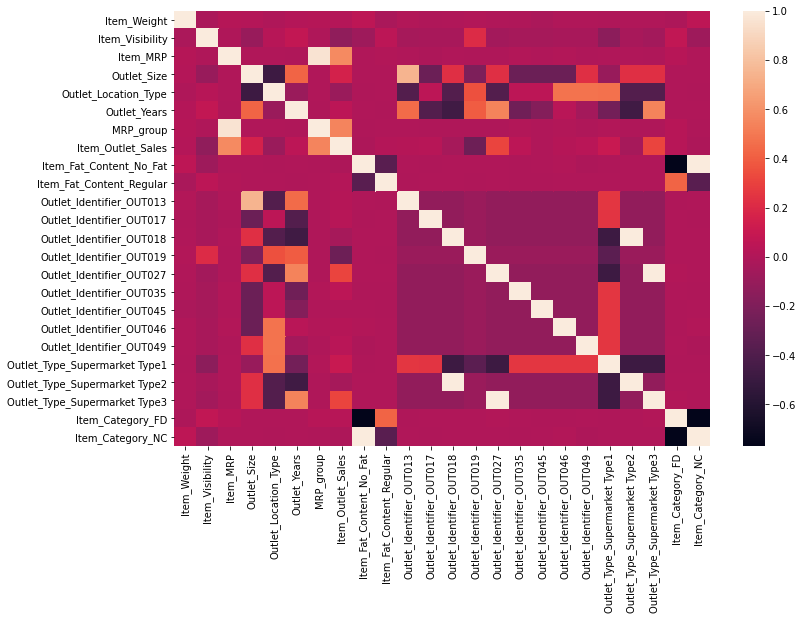

In [146]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr())

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    8523 non-null   float64
 1   Item_Visibility                8523 non-null   float64
 2   Item_MRP                       8523 non-null   float64
 3   Outlet_Size                    8523 non-null   int64  
 4   Outlet_Location_Type           8523 non-null   int64  
 5   Outlet_Years                   8523 non-null   int64  
 6   MRP_group                      8523 non-null   int64  
 7   Item_Outlet_Sales              8523 non-null   float64
 8   Item_Fat_Content_No_Fat        8523 non-null   uint8  
 9   Item_Fat_Content_Regular       8523 non-null   uint8  
 10  Outlet_Identifier_OUT013       8523 non-null   uint8  
 11  Outlet_Identifier_OUT017       8523 non-null   uint8  
 12  Outlet_Identifier_OUT018       8523 non-null   u

## Normalize

In [149]:
numerical_var = ['Item_Visibility']

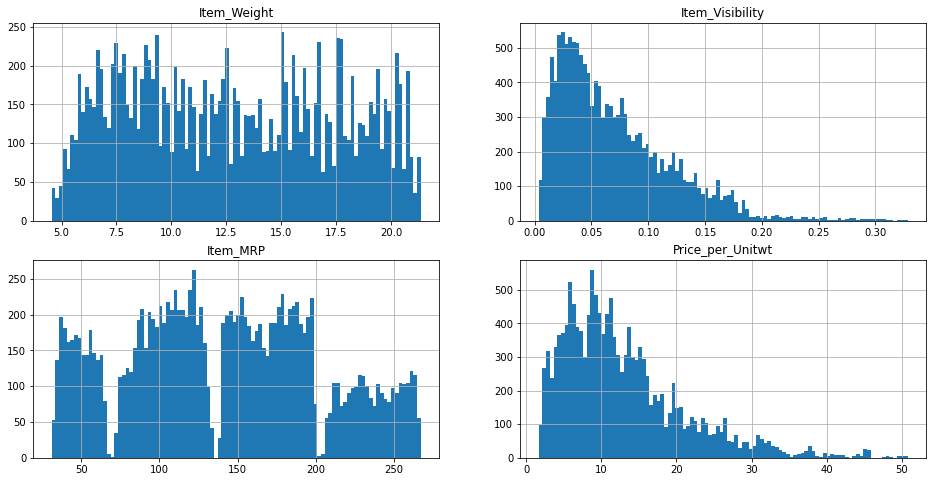

In [27]:
plt.figure(figsize=(16,8))
for i,var in enumerate(numerical_var):
    plt.subplot(2,2,i+1)
    data[var].hist(bins=100)
    plt.title(var)

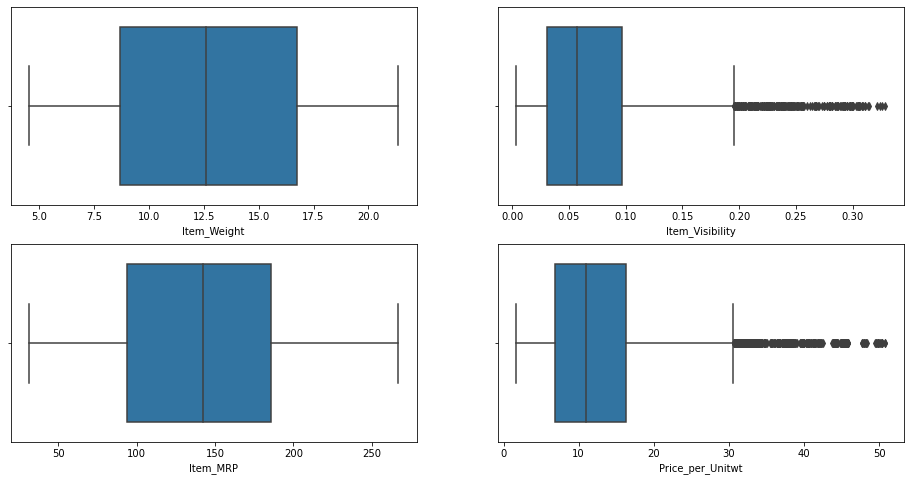

In [30]:
plt.figure(figsize=(16,8))
for i,var in enumerate(numerical_var):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[var])

In [31]:
tran = ['Item_Visibility','Price_per_Unitwt']

In [150]:
from scipy.stats import boxcox

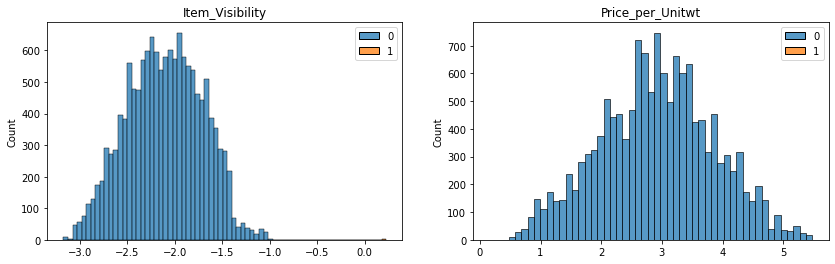

In [33]:
plt.figure(figsize=(14,4))
for i,var in enumerate(tran):
    plt.subplot(1,2,i+1)
    sns.histplot(boxcox(data[var]))
    plt.title(var)

In [151]:
ds['Item_Visibility'] = boxcox(ds['Item_Visibility'])[0]
# ds['Price_per_Unitwt'] = boxcox(ds['Price_per_Unitwt'])[0]

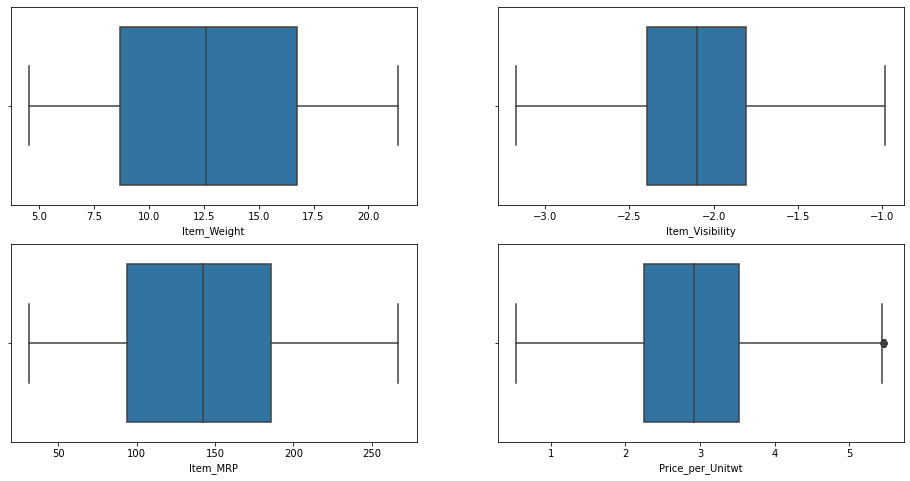

In [35]:
plt.figure(figsize=(16,8))
for i,var in enumerate(numerical_var):
    plt.subplot(2,2,i+1)
    sns.boxplot(ds[var])

In [152]:
train = ds.loc['train']
test = ds.loc['test']

In [153]:
from scipy.special import inv_boxcox

In [154]:
b,lmd = boxcox(train['Item_Outlet_Sales'])

<AxesSubplot:ylabel='Count'>

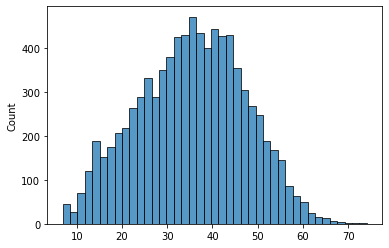

In [155]:
sns.histplot(b)

<AxesSubplot:ylabel='Count'>

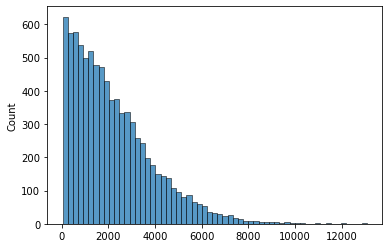

In [156]:
sns.histplot(inv_boxcox(b,lmd))

## Target Transformation

In [157]:
train['Item_Outlet_Sales'] = b

In [158]:
train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Years,MRP_group,Item_Outlet_Sales,Item_Fat_Content_No_Fat,Item_Fat_Content_Regular,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_FD,Item_Category_NC
0,9.300,-2.676423,249.8092,2,3,11,4,47.007885,0,0,...,0,0,0,0,1,1,0,0,1,0
1,5.920,-2.603402,48.2692,2,1,1,1,20.958294,0,1,...,0,0,0,0,0,0,1,0,0,0
2,17.500,-2.659398,141.6180,2,3,11,3,37.964893,0,0,...,0,0,0,0,1,1,0,0,1,0
3,19.200,-2.634766,182.0950,1,1,12,3,25.485930,0,1,...,0,0,0,0,0,0,0,0,1,0
4,8.930,-2.858968,53.8614,3,1,23,1,28.660858,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,-2.105517,214.5218,3,1,23,4,42.145847,0,0,...,0,0,0,0,0,1,0,0,1,0
8519,8.380,-2.201939,108.1570,1,2,8,2,22.794301,0,1,...,0,0,1,0,0,1,0,0,1,0
8520,10.600,-2.341274,85.1224,1,2,6,2,30.712790,1,0,...,0,1,0,0,0,1,0,0,0,1
8521,7.210,-1.561056,103.1332,2,1,1,2,36.195026,0,1,...,0,0,0,0,0,0,1,0,1,0


In [159]:
X = train.drop(['Item_Outlet_Sales'],axis=1)
y= train['Item_Outlet_Sales']

In [160]:
from sklearn.model_selection import train_test_split 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

In [161]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

## PipeLine

## Linear_Regression

In [162]:

step1 = StandardScaler()

step2 = LinearRegression()

pipe  = Pipeline([ 
        ('step1',step1),
        ('step2',step2),
        ])

In [164]:
cross_val_score(pipe,X,y)

array([0.68474257, 0.67161758, 0.66842905, 0.68394449, 0.69515853])

## Random Forest

In [165]:

step1 = StandardScaler()

step2 = RandomForestRegressor(n_estimators=1000)

pipe  = Pipeline([ 
        ('step1',step1),
        ('step2',step2),
        ])

In [166]:
cross_val_score(pipe,X,y)

array([0.66518361, 0.65265452, 0.65046142, 0.66551235, 0.67498403])

In [168]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1', StandardScaler()),
                ('step2', RandomForestRegressor(n_estimators=1000))])

In [169]:
r2_score(pipe.predict(X_test),y_test)

0.5275571772497916

In [170]:
#HPT

fi = pd.Series(pipe.steps[1][1].feature_importances_,X_train.columns).sort_values(ascending=False)
fi

Item_MRP                         0.413138
Outlet_Identifier_OUT019         0.154328
Item_Visibility                  0.086861
Outlet_Years                     0.074104
Outlet_Type_Supermarket Type1    0.070770
Item_Weight                      0.066528
Outlet_Size                      0.020826
Outlet_Type_Supermarket Type2    0.019089
Outlet_Identifier_OUT018         0.018408
Outlet_Type_Supermarket Type3    0.017233
Outlet_Identifier_OUT027         0.015901
Item_Fat_Content_Regular         0.007488
Item_Category_FD                 0.005644
Outlet_Location_Type             0.004723
Outlet_Identifier_OUT045         0.004329
Outlet_Identifier_OUT035         0.004043
Outlet_Identifier_OUT046         0.003635
Item_Category_NC                 0.002864
Item_Fat_Content_No_Fat          0.002794
Outlet_Identifier_OUT049         0.002675
Outlet_Identifier_OUT017         0.002266
Outlet_Identifier_OUT013         0.001301
MRP_group                        0.001052
dtype: float64

In [171]:
pipe.fit(X,y)

Pipeline(steps=[('step1', StandardScaler()),
                ('step2', RandomForestRegressor(n_estimators=1000))])

In [178]:
test.drop('Item_Outlet_Sales',axis=1,inplace=True)

In [189]:
y_p = pipe.predict(test)

In [190]:
y_p = inv_boxcox(y_p,lmd)

In [191]:
sathish_sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1435.782541
1,FDW14,OUT017,1333.456545
2,NCN55,OUT010,697.978630
3,FDQ58,OUT017,1449.446252
4,FDY38,OUT027,6388.103180


In [192]:
y_p

array([1558.05270593, 1329.31428886,  604.27429918, ..., 1733.72513126,
       3259.10031063, 1161.30369302])

In [193]:
sathish_sub['Item_Outlet_Sales'] = y_p

In [194]:
sathish_sub.to_csv('sathish2.csv',index=False)

## Gradient Boost

In [186]:
step1 = StandardScaler()

step2 = GradientBoostingRegressor()

pipe  = Pipeline([ 
        ('step1',step1),
        ('step2',step2),
        ])

In [187]:
pipe.fit(X_train,y_train)
r2_score(pipe.predict(X_test),y_test)

0.5491194619324279

In [188]:
cross_val_score(pipe,X,y)

array([0.69298575, 0.68592017, 0.68282526, 0.69807246, 0.70871532])

## ExtraTrees

In [195]:
step1 = StandardScaler()

step2 = ExtraTreesRegressor()

pipe  = Pipeline([ 
        ('step1',step1),
        ('step2',step2),
        ])

In [196]:
pipe.fit(X_train,y_train)
r2_score(pipe.predict(X_test),y_test)

0.49262310239082807

In [197]:
cross_val_score(pipe,X,y)

array([0.63515955, 0.62824379, 0.62350503, 0.6364041 , 0.64072986])

## XGBoost

In [198]:
step1 = StandardScaler()

step2 = XGBRegressor()

pipe  = Pipeline([ 
        ('step1',step1),
        ('step2',step2),
        ])

In [199]:
pipe.fit(X_train,y_train)
r2_score(pipe.predict(X_test),y_test)

0.5211973519017764

In [200]:
cross_val_score(pipe,X,y)

array([0.654798  , 0.64930741, 0.63237142, 0.64791818, 0.6750823 ])

In [219]:
#HPT

fi = pd.Series(pipe.steps[1][1].feature_importances_,X_train.columns).sort_values()


<BarContainer object of 23 artists>

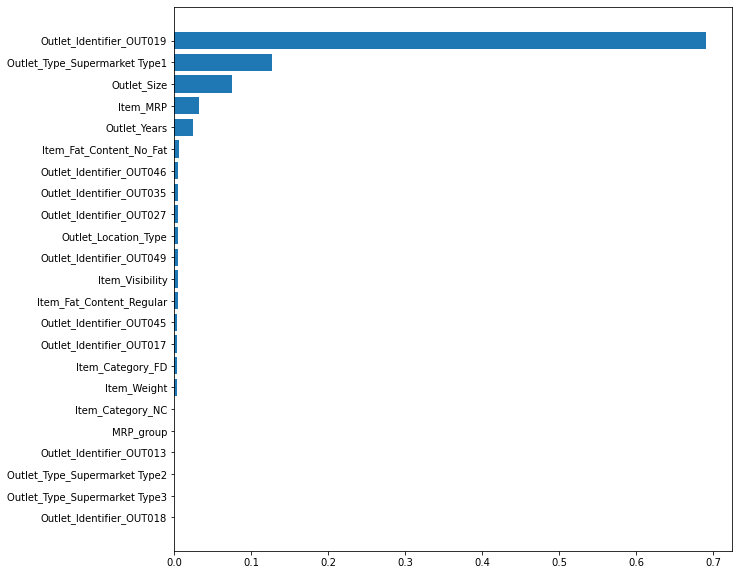

In [220]:
plt.figure(figsize=(10,10))

plt.barh(fi.index,fi.values)